In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from matplotlib import style
style.use("fivethirtyeight")

In [3]:
df = pd.read_csv("tesla.csv")

In [4]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [5]:
df.tail()

,Date,Open,High,Low,Close,Volume,Adj Close
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988
1691,3/17/2017,264.000000,265.329987,261.200012,261.500000,6475900,261.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [7]:
df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


In [8]:
#Created 2 new cols
df["HL_diff"]= (df["High"]-df["Low"])/df["Low"]*100
df["OC_diff"]= (df["Close"]-df["Open"])/df["Open"]*100

In [9]:
dates = np.array(df["Date"])
date_check = dates[-30:]
date = dates[:-30]

In [10]:
df = df[["HL_diff","OC_diff","Adj Close","Volume"]]

In [11]:
df["PriceNextMonth"]=df["Adj Close"].shift(-30)

In [12]:
df.tail()

,HL_diff,OC_diff,Adj Close,Volume,PriceNextMonth
1687,1.676418,0.551422,246.169998,3010700,NaN
1688,4.918296,4.831173,258.000000,7575500,NaN
1689,2.646791,-0.494165,255.729996,4816600,NaN
1690,2.582414,-0.133386,262.049988,7100400,NaN
1691,1.581154,-0.946970,261.500000,6475900,NaN


In [14]:
X = np.array(df.drop(["PriceNextMonth"],1))
X = preprocessing.scale(X)
X_check = X[-30:]
X = X[:-30]
df.dropna(inplace=True)
y = np.array(df["PriceNextMonth"])

C:\Users\Yash\AppData\Local\Temp\ipykernel_53980\739002216.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(["PriceNextMonth"],1))


In [15]:
X_train,x_test,Y_train,y_test = train_test_split(X,y, test_size = 0.2)

In [16]:
model = RandomForestRegressor()

In [17]:
model.fit(X_train,Y_train)

RandomForestRegressor()

In [18]:
conf = model.score(x_test,y_test)
print(conf)

0.9512054247600576


In [19]:
model.fit(X,y)

RandomForestRegressor()

In [20]:
prediction = model.predict(X_check)

In [26]:
actual = pd.DataFrame(dates, columns = ["Date"])
actual["ClosePrice"] = df["Adj Close"]
actual["Forecast"] = np.nan
actual.set_index("Date", inplace = True)
forecast = pd.DataFrame(date_check, columns=["Date"])
forecast["Forecast"] = prediction
forecast["ClosePrice"] = np.nan
forecast.set_index("Date", inplace = True)
var = [actual, forecast]
result = pd.concat(var) 

In [27]:
result

,ClosePrice,Forecast
Date,,
6/29/2010,23.889999,NaN
6/30/2010,23.830000,NaN
7/1/2010,21.959999,NaN
7/2/2010,19.200001,NaN
7/6/2010,16.110001,NaN
...,...,...
3/13/2017,NaN,240.490802
3/14/2017,NaN,226.862902
3/15/2017,NaN,246.079598


Text(0, 0.5, 'Price')

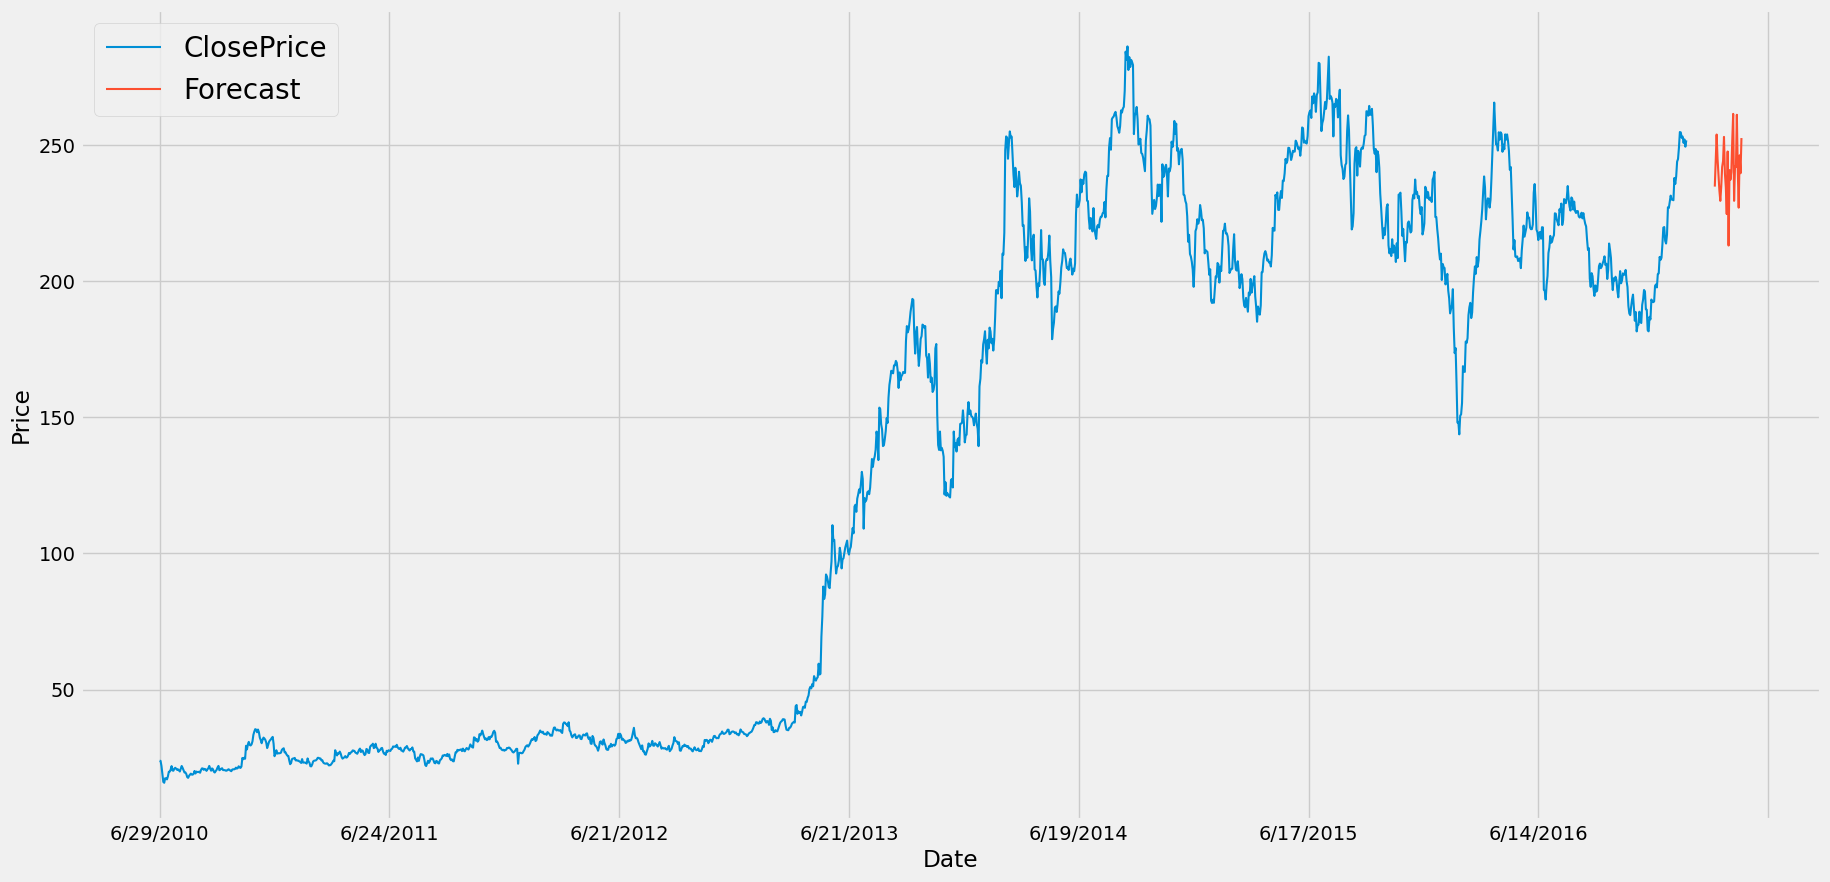

In [29]:
result.plot(figsize=(20,10),linewidth=1.5)
plt.legend(loc=2,prop={'size':20})
plt.xlabel("Date")
plt.ylabel("Price")